<a href="https://colab.research.google.com/github/TillVollmer5/mass_spectroscopy/blob/main/Scatter_Unknown_Screening.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [12]:
Auto_5_gp_df = pd.read_csv('/content/drive/My Drive/unknown_screening_data/Auto5_PUF_120k_blank_filtered.csv')
Auto_4_gp_df = pd.read_csv('/content/drive/My Drive/unknown_screening_data/Auto4_PUF_120k_blank_filtered.csv')
Auto_3_gp_df = pd.read_csv('/content/drive/My Drive/unknown_screening_data/Auto3_PUF_120k_blank_filtered.csv')
Auto_2_gp_df = pd.read_csv('/content/drive/My Drive/unknown_screening_data/Auto2_PUF_120k_blank_filtered.csv')
Auto_1_gp_df = pd.read_csv('/content/drive/My Drive/unknown_screening_data/Auto1_PUF_120k_blank_filtered.csv')

Auto_5_pm_df = pd.read_csv('/content/drive/My Drive/unknown_screening_data/Auto5_PF_120k_blank_filtered.csv')
Auto_4_pm_df = pd.read_csv('/content/drive/My Drive/unknown_screening_data/Auto4_PF_120k_blank_filtered.csv')
Auto_3_pm_df = pd.read_csv('/content/drive/My Drive/unknown_screening_data/Auto3_PF_120k_blank_filtered.csv')
Auto_2_pm_df = pd.read_csv('/content/drive/My Drive/unknown_screening_data/Auto2_PF_120k_blank_filtered.csv')
Auto_1_pm_df = pd.read_csv('/content/drive/My Drive/unknown_screening_data/Auto1_PF_120k_blank_filtered.csv')

U181_df = pd.read_csv('/content/drive/My Drive/unknown_screening_data/U181_120k_blank_filtered.csv')

In [13]:
def extract_elements(df):
    def extract_elements_from_formula(formula):
        elements = {'C': 0, 'O': 0, 'N': 0, 'S': 0, 'Si': 0, 'Cl': 0, 'F': 0, 'Br': 0, 'I': 0, 'B': 0, 'P': 0}

        current_element = ''
        current_count = ''

        for char in formula:
            if char.isalpha():
                if current_element:
                    #Update the count for the current element if it's in the predefined set
                    if current_element in elements:
                        elements[current_element] += int(current_count) if current_count else 1
                current_element = char
                current_count = ''
            elif char.isdigit():
                current_count += char

        #Handle the last element in the formula
        if current_element in elements:
            elements[current_element] += int(current_count) if current_count else 1

        return pd.Series(elements)

    #Apply the extract_elements_from_formula function to the 'Formula (mol ion)' column
    element_counts = df['Formula (mol ion)'].apply(extract_elements_from_formula)

    #Merge the extracted element counts with the original DataFrame
    df = pd.concat([df, element_counts], axis=1)
    return df

In [15]:
Auto_5_gp_df = extract_elements(Auto_5_gp_df)
Auto_4_gp_df = extract_elements(Auto_4_gp_df)
Auto_3_gp_df = extract_elements(Auto_3_gp_df)
Auto_2_gp_df = extract_elements(Auto_2_gp_df)
Auto_1_gp_df = extract_elements(Auto_1_gp_df)

Auto_5_pm_df = extract_elements(Auto_5_pm_df)
Auto_4_pm_df = extract_elements(Auto_4_pm_df)
Auto_3_pm_df = extract_elements(Auto_3_pm_df)
Auto_2_pm_df = extract_elements(Auto_2_pm_df)
Auto_1_pm_df = extract_elements(Auto_1_pm_df)

U181_df = extract_elements(U181_df)

In [5]:
print(Auto_1_gp_df.head())

   Unnamed: 0                                     Component Name  \
0           0  1,2-Dicarboxy-3-(4-chlorophenyl)-2,3(1H)-dihyd...   
1           2  Trifluoroacetic acid, 2-tetrahydrofurylmethyl ...   
2           3                  2,6-Octadiene-4,5-diol, 4-methyl-   
3           4  Butylphosphonic acid, butyl 4-methylaminopheny...   
4           5        3,4(2H,5H)-Furandione, 2,2,5,5-tetramethyl-   

   Retention Time  Reference m/z      Area   Height      TIC  \
0           4.060      73.064812   7304861   729249  2049696   
1           4.144      71.049171   3515188   457052   819840   
2           4.186      45.033539  21256133  1762011  5285805   
3           4.217     299.061707   3419117   276355   762892   
4           4.249      42.009926    447955   102445   252887   

  Formula (mol ion)     CAS No.     SI  ...  O  N  S  Si Cl  F  Br  I  B  P  
0      C19H15ClN2O4           0  522.0  ...  4  2  0   0  0  0   0  0  0  0  
1          C7H9F3O3  71239-15-1  625.0  ...  3  0 

In [6]:
df_names = ['Auto_5_gp_df', 'Auto_4_gp_df', 'Auto_3_gp_df', 'Auto_2_gp_df', 'Auto_1_gp_df', 'Auto_5_pm_df', 'Auto_4_pm_df', 'Auto_3_pm_df', 'Auto_2_pm_df', 'Auto_1_pm_df']
dfs = [globals()[name] for name in df_names]

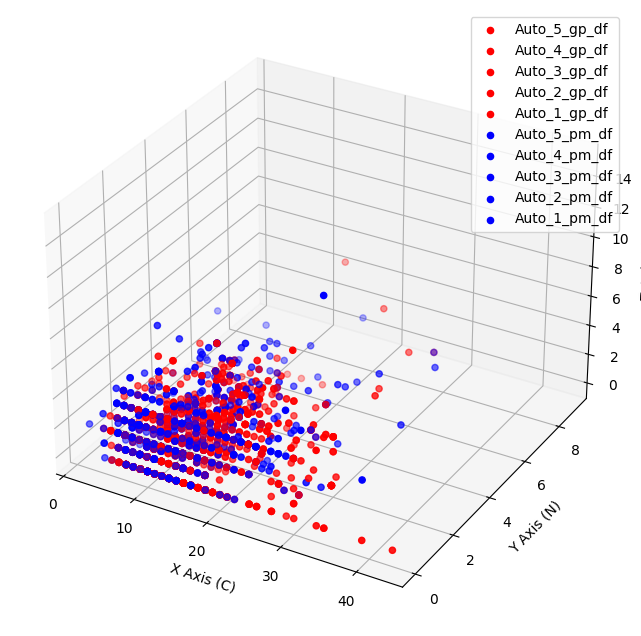

In [7]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

colors = ['red' if 'gp' in df_name else 'blue' for df_name in df_names]

for df, color, df_name in zip(dfs, colors, df_names):
    # Extract relevant columns
    x_values = df['C']
    y_values = df['N']
    z_values = df['O']

    ax.scatter(x_values, y_values, z_values, c=color, label=df_name)

ax.set_xlabel('X Axis (C)')
ax.set_ylabel('Y Axis (N)')
ax.set_zlabel('Z Axis (O)')

ax.legend()

plt.show()

In [8]:
df = Auto_5_gp_df

fig = px.scatter_3d(df, x='C', y='O', z='N', hover_data=['Component Name'], title='3D Scatter Plot CNO - Auto_5_gp_df')

fig.show()

In [11]:
df = Auto_5_pm_df

fig = px.scatter_3d(df, x='C', y='O', z='N', hover_data=['Component Name'], title='3D Scatter Plot CNO - Auto_5_pm_df')

fig.show()

In [16]:
df = U181_df

fig = px.scatter_3d(df, x='C', y='O', z='N', hover_data=['Component Name'], title='3D Scatter Plot CNO - U181')

fig.show()